<a href="https://colab.research.google.com/github/sbal06/Fashion-MNIST/blob/OtherClassificationAlgorithms/ClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()



print("Train images shape is " + str(X_train.shape))
print("Train labels shape is " + str(y_train.shape))
print("Test images shape is " + str(X_test.shape))
print("Test labels shape is " + str(y_test.shape))


classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boots']


labels_dict = {0: 'T_shirt/Top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandals', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boots'}

# check if the testing data is balanced:



Train images shape is (60000, 28, 28)
Train labels shape is (60000,)
Test images shape is (10000, 28, 28)
Test labels shape is (10000,)


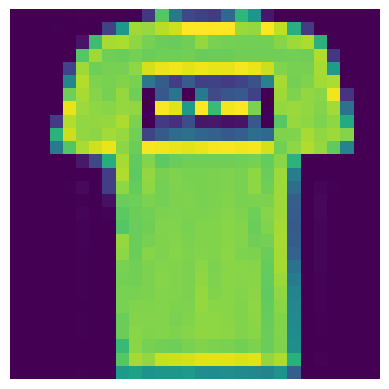

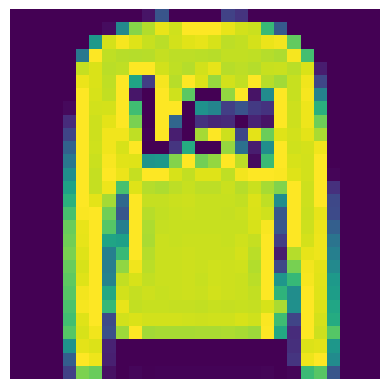

In [ ]:

def showImage(image_array):
  reshaped_image_array = image_array.reshape(28, 28)
  plt.imshow(reshaped_image_array)
  plt.axis('off')
  plt.show()

showImage(X_train[1])
showImage(X_test[1])

# **Implementing K-Nearest Neighbors**

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test = X_train.reshape(10000, -1)
knn_model = KNeighborsClassifier()
k_range = list(range(2, 6))
param_grid = dict(n_neighbors = k_range)

# Now perform GridSearch to find the optimal value of k

grid_search = GridSearchCV(knn_model, param_grid, n_jobs = -1,  cv = 3, return_train_score = False, verbose = 1)
best_fit = grid_search.fit(X_train, y_train)
print(best_fit.best_params_)

accuracy = best_fit.best_score_ * 100
print(accuracy)

#85.24% accuracy

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'n_neighbors': 3}
83.95833333333333


# **Implementing a Decision Trees classifier**

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
decisiontree_model = DecisionTreeClassifier(max_depth = 12)
decisiontree_model.fit(X_train, y_train)
y_pred = decisiontree_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Decision Tree Classifier has a " + str(accuracy*100) + "%")

Decision Tree Classifier has a 78.39%


# **Basic Neural Network**

In [10]:
# Basic Neural Network

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)


mlp_model = Sequential()
mlp_model.add(Dense(1024, activation = 'relu', input_shape = (784, )))  # X_train.shape = (60000, 784) --> passes a (784,) flattened array
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(512, activation = 'relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(512, activation = 'relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(10, activation = 'softmax'))

optimizer = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999)
batch_size = 128
epochs = 20
mlp_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

mlp_model_history = mlp_model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test), shuffle = True)

_, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose = 1)

print(test_accuracy)

Epoch 1/20
469/469 [==============================] - 48s 93ms/step - loss: 0.6707 - accuracy: 0.7685 - val_loss: 0.4694 - val_accuracy: 0.8336
Epoch 2/20
469/469 [==============================] - 33s 71ms/step - loss: 0.4917 - accuracy: 0.8255 - val_loss: 0.4745 - val_accuracy: 0.8355
Epoch 3/20
469/469 [==============================] - 24s 50ms/step - loss: 0.4674 - accuracy: 0.8345 - val_loss: 0.5197 - val_accuracy: 0.8223
Epoch 4/20
469/469 [==============================] - 21s 45ms/step - loss: 0.4477 - accuracy: 0.8390 - val_loss: 0.4772 - val_accuracy: 0.8381
Epoch 5/20
469/469 [==============================] - 27s 58ms/step - loss: 0.4413 - accuracy: 0.8411 - val_loss: 0.4539 - val_accuracy: 0.8481
Epoch 6/20
469/469 [==============================] - 23s 48ms/step - loss: 0.4296 - accuracy: 0.8462 - val_loss: 0.4322 - val_accuracy: 0.8546
Epoch 7/20
469/469 [==============================] - 20s 44ms/step - loss: 0.4249 - accuracy: 0.8453 - val_loss: 0.4533 - val_accuracy:

Text(0.5, 1.0, 'Training Accuracy versus Testing Accuracy')

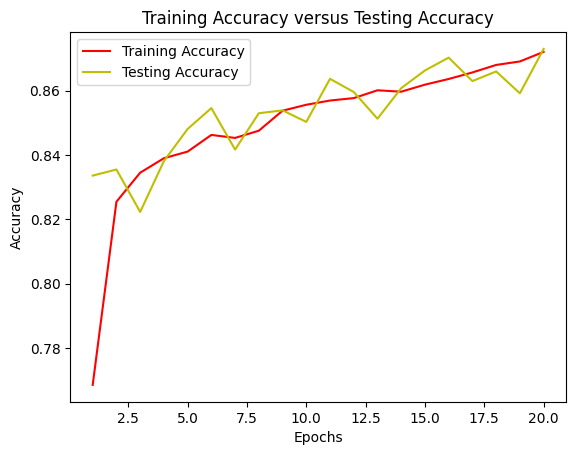

In [13]:
# Plot training and testing accuracy

training_accuracy = mlp_model_history.history['accuracy']
testing_accuracy = mlp_model_history.history['val_accuracy']

epoch_count = range(1, 21)

plt.plot(epoch_count, training_accuracy, color = 'r', label = 'Training Accuracy')
plt.plot(epoch_count, testing_accuracy, color ='y', label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy versus Testing Accuracy')

Text(0.5, 1.0, 'Training Loss versus Testing Loss')

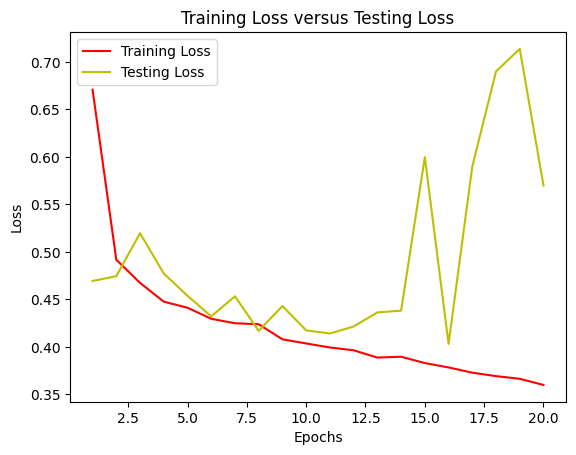

In [15]:
# Training and Testing Loss

# Plot training and testing accuracy

training_loss = mlp_model_history.history['loss']
testing_loss = mlp_model_history.history['val_loss']

epoch_count = range(1, 21)

plt.plot(epoch_count, training_loss, color = 'r', label = 'Training Loss')
plt.plot(epoch_count, testing_loss, color ='y', label = 'Testing Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss versus Testing Loss')